In [1]:
import sys
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sherlock import helpers
from sherlock.features.preprocessing import extract_features, convert_string_lists_to_lists, prepare_feature_extraction
from sherlock.deploy.train_sherlock import train_sherlock
from sherlock.deploy.predict_sherlock import predict_sherlock
from  profiling import generate_header
from  profiling import identify_header
from  profiling import preprocess_before_count
from  profiling import filter_categories
from  profiling import get_var_category
from  profiling import process_df
from  profiling import generate_df
from  profiling import make_clickable
from  profiling import read_info
from  profiling import trans_age
from  profiling import generate_candidate

In [3]:
import numbers
import json
#'pip install git+git://github.com/clintval/gender_predictor.git'
from gender_predictor import GenderPredictor
import itertools
import networkx as nx

In [4]:
process_file = open("processed.txt","r") 

In [5]:
processed_dataset = []
count = 0
for pf in process_file.readlines():
    if pf != '\n':
        processed_dataset.append(pf)

## Download data
This will download the raw values and preprocessed files, the corresponding labels as well as a few other supporting files:
- `download_data()` will download 3.6GB of data into the `data/` directory.
- `prepare_feature_extraction()` will download +/- 800 MB of data into the `features/` directory.

In [11]:
helpers.download_data()
prepare_feature_extraction()

Data was downloaded.
Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


# Find all csv files

In [9]:
import os
from glob import glob
PATH = "F:/Data"
EXT = "*.csv"

In [10]:
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
info = pd.DataFrame(columns = ['Dataset_ID','Age','Gender','Race','Ethnicity','Country','Maximal Uncovered Pattern(Sensitive)','Uncovered Attributes','Report'])
#processed_dataset = []

all_csv_files = ['adult.csv']

In [ ]:
for file in all_csv_files:
    try:
        if count <= 0:
            processed_dataset.append(file)
            with open('processed.txt', 'w') as f:
                for item in processed_dataset:
                    f.write("%s\n" % item)
            f.close()
            dataset_ID = file[8:17]
            #dataset_ID = 'adult.csv'
            tmp_samples = pd.read_csv(file)
            # Generate PDF report
            profile = ProfileReport(tmp_samples, title=dataset_ID, explorative=True)
            output_path = "report/" + dataset_ID +".html"
            profile.to_file(output_path)
            header, predicted_labels,candidate,name,gender,age,country,race,ethnicity,age_attribute = generate_candidate(tmp_samples.columns,file)
            if not header:
                tmp_samples.columns = predicted_labels
            for i in age_attribute:
                tmp_samples[i] = tmp_samples[i].apply(lambda x: trans_age(x))
            tmp, gender = preprocess_before_count(tmp_samples,name,gender)
            mup, uncover = process_df(tmp,candidate,age)
            tmp_info = generate_df(dataset_ID,age,gender,race,ethnicity,country,mup,uncover)
            #tmp_info = tmp_info.style.format({'Report': make_clickable})
            info = pd.concat([info, tmp_info], axis=0, sort=False)
            #info.to_excel(r'output.xlsx',index = False)
            #info.to_csv(r'output.csv',index = False)
            output = info.copy()
            output = output.style.format({'Report': make_clickable})
            output.to_excel(r'adult.xlsx', index = False)
            del output
        else:
            count -= 1
    except:
        pass
#info = info.style.format({'Report': make_clickable})
#info.to_csv(r'info.csv', index = False)

W1212 16:30:16.855356 16300 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1212 16:30:16.856357 16300 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1212 16:30:16.858359 16300 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with 

Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 37966.54it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.23it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3995.53it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 29.57it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 1782.27it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 3397.01it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:10<00:00,  1.05it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 36002.61it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 195.48it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 17.09it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 16.02it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 237.89it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1390.11it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 5595.60it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 8659.04it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 20981.51it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 8992.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 9991.20it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5996.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<00:00, 12114.32it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 5995.67it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5994.72it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3995.53it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 932.54it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 4995.00it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7989.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2996.64it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 128.92it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3330.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15978.30it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 20976.51it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15985.91it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5993.29it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1383.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.11it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 719.42it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5996.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1999.19it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


E1212 17:59:20.315117 13116 _base.py:627] exception calling callback for <Future at 0x1bf3f321648 state=finished returned list>
Traceback (most recent call last):
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\parallel.py", line 827, in dispatch_one_batch
    tasks = self._ready_batches.get(block=False)
  File "c:\users\tiany\anaconda3\envs\cs576\lib\queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\parallel.py", line 799, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 832.63it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 97.31it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 14656.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 631.02it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 488.13it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 189.23it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13967.71it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.04it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13981.01it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4995.60it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19963.37it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 390.47it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 11986.58it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4994.41it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 3197.18it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1198.97it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 3996.95it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 5327.79it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 473.28it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2164.76it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 71.37it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 4496.04it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 26866.64it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.
Extracting features for data column: 100


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2997.36it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 4995.60it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5994.72it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5996.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 1577.56it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 799.22it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 999.20it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 7994.23it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 8992.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4995.60it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 490.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1998.24it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3330.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 592.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2997.36it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 1624.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.
Extracting features for data column: 100


100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 4567.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 351.05it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 610.58it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1998.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1082.44it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 666.09it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 8357.00it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.56it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2663.90it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 1093.79it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 721.61it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 4937.10it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 3996.48it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2248.02it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1332.19it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 4904.98it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 66.87it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 482.34it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1398.77it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 454.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 172.82it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 481.07it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 310.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 6994.67it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 545.01it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 4853.09it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1997.92it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 275.62it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 4852.87it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.58it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 44.05it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 2398.12it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 27.28it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 868.87it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2664.74it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 91.91it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 2331.09it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1998.31it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 3596.83it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


E1212 21:10:15.983177 20940 _base.py:627] exception calling callback for <Future at 0x1c325900fc8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "c:\users\tiany\anaconda3\envs\cs576\lib\multiprocessing\queues.py", line 113, in get
    return _ForkingPickler.loads(res)
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\joblib\parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "c:\users\tiany\anaconda3

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 164.24it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


In [ ]:
for file in all_csv_files:
    try:
        processed_dataset.append(file)
        with open('processed.txt', 'w') as f:
            for item in processed_dataset:
                f.write("%s\n" % item)
        f.close()
        dataset_ID = file[8:17]
        #dataset_ID = 'adult.csv'
        tmp_samples = pd.read_csv(file)
        # Generate PDF report
        profile = ProfileReport(tmp_samples, title=dataset_ID, explorative=True)
        output_path = "report/" + dataset_ID +".html"
        profile.to_file(output_path)
        header, predicted_labels,candidate,name,gender,age,country,race,ethnicity,age_attribute = generate_candidate(tmp_samples.columns,file)
        if not header:
            tmp_samples.columns = predicted_labels
        for i in age_attribute:
            tmp_samples[i] = tmp_samples[i].apply(lambda x: trans_age(x))
        tmp, gender = preprocess_before_count(tmp_samples,name,gender)
        mup, uncover = process_df(tmp,candidate,age)
        tmp_info = generate_df(dataset_ID,age,gender,race,ethnicity,country,mup,uncover)
        #tmp_info = tmp_info.style.format({'Report': make_clickable})
        info = pd.concat([info, tmp_info], axis=0, sort=False)
        #info.to_excel(r'output.xlsx',index = False)
        #info.to_csv(r'output.csv',index = False)
        output = info.copy()
        output = output.style.format({'Report': make_clickable})
        output.to_excel(r'adult.xlsx', index = False)
        del output
    except:
        pass
#info = info.style.format({'Report': make_clickable})
#info.to_csv(r'info.csv', index = False)

W1212 14:27:56.343553 22276 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1212 14:27:56.344554 22276 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1212 14:27:56.346055 22276 deprecation.py:506] From c:\users\tiany\anaconda3\envs\cs576\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with 

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 7989.15it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13981.01it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2997.36it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 11989.43it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5994.72it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 666.08it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7994.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 1373.79it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 55.85it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 10990.32it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 15983.38it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 407.82it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 589.24it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1398.77it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 19982.39it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2996.64it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 28.03it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2597.71it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2998.07it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1998.24it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.24it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 3530.28it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 387.72it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 882.94it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 3330.40it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 6394.37it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 4396.55it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 6993.84it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 81.63it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 5745.62it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 11989.43it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1427.31it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 580.16it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 585.21it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7992.96it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5994.72it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5991.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7994.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7992.96it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 305.29it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 3999.65it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1248.90it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 5594.54it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 4496.04it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 705.28it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 24977.99it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 303.11it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 5995.67it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 629.60it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1748.77it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7992.96it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2283.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 3463.61it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 646.50it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7994.86it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 422.17it/s]


Preparing feature extraction by downloading 2 files:
        
 ../sherlock/features/glove.6B.50d.txt and 
 ../sherlock/features/par_vec_trained_400.pkl.docvecs.vectors_docs.npy.
        
All files for extracting word and paragraph embeddings are present.


# Read the output info.xlsx

with open('testSet.txt','w') as f:
    f.write(str(uncover)) 

In [4]:
a = read_info('info.xlsx')

In [5]:
a

,Dataset_ID,Age,Gender,Race,Ethnicity,Country,Maximal Uncovered Pattern,Uncovered Attributes,Report
0,2a55-dhk8,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2a55-dhk8.html
1,2a6u-j5q7,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2a6u-j5q7.html
2,2abb-gr8d,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2abb-gr8d.html
3,2axz-xm4q,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2axz-xm4q.html
4,2azu-r5bu,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2azu-r5bu.html
5,2b6v-a2gs,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2b6v-a2gs.html
6,2b9e-mbxk,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2b9e-mbxk.html
7,2bbq-3f25,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2bbq-3f25.html
8,2be9-wu5b,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2be9-wu5b.html
9,2bmr-jdsv,Not Exist,Not Exist,Not Exist,Not Exist,Not Exist,[],nan,2bmr-jdsv.html


In [11]:
import igraph
from igraph import Graph, EdgeSeq

In [ ]:
for i in range(1,len(uncover)+1):
    att_comb = itertools.combinations(uncover, i)
    for att in att_comb:
        value = tmp[list(att)].drop_duplicates().values
        if i == 1:
            # Connect to root node
            for val in value:
                G.add_node(tuple(val))
                G.add_edge('root',tuple(val))
        else:
            for val in value:
                G.add_node(tuple(val))
                for prev in list(G.nodes):
                    if prev in val:
                        G.add_edge(prev,tuple(val))

In [12]:
from igraph import *

In [30]:
uncover

{'age', 'hours.per.week', 'native.country', 'race', 'sex'}

In [64]:
num_node = 0
node_map = dict()

In [32]:
node_map['root'] = num_node
num_node += 1

import collections
compare = lambda x, y: collections.Counter(x) == collections.Counter(y)

In [65]:
g = Graph()

plot(g, "social_network.pdf")

layout = g.layout("kk")
plot(g, layout = layout)

In [82]:
mup_frozen = []
for i in mup:
    mup_frozen.append(frozenset(i))

In [86]:
for i in range(1,len(uncover)+1):
    att_comb = itertools.combinations(uncover, i)
    for att in att_comb:
        value = tmp[list(att)].drop_duplicates().values
        if i == 1:
            # Connect to root node
            for val in value:
                G.add_node(frozenset(val))
                G.add_edge('root',frozenset(val))
            print(frozenset(val) in mup_frozen)
        '''
        else:
            for val in value:
                G.add_node(tuple(val))
                for prev in list(G.nodes):
                    if prev in val:
                        G.add_edge(prev,tuple(val))
        '''

False
False
True
False
False


In [13]:
def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node
       levels: a dictionary
               key: level number (starting from 0)
               value: number of nodes in this level
       width: horizontal space allocated for drawing
       height: vertical space allocated for drawing'''
    TOTAL = "total"
    CURRENT = "current"
    def make_levels(levels, node=root, currentLevel=0, parent=None):
        """Compute the number of nodes for each level
        """
        if not currentLevel in levels:
            levels[currentLevel] = {TOTAL : 0, CURRENT : 0}
        levels[currentLevel][TOTAL] += 1
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if not neighbor == parent:
                levels =  make_levels(levels, neighbor, currentLevel + 1, node)
        return levels

    def make_pos(pos, node=root, currentLevel=0, parent=None, vert_loc=0):
        dx = 1/levels[currentLevel][TOTAL]
        left = dx/2
        pos[node] = ((left + dx*levels[currentLevel][CURRENT])*width, vert_loc)
        levels[currentLevel][CURRENT] += 1
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if not neighbor == parent:
                pos = make_pos(pos, neighbor, currentLevel + 1, node, vert_loc-vert_gap)
        return pos
    if levels is None:
        levels = make_levels({})
    else:
        levels = {l:{TOTAL: levels[l], CURRENT:0} for l in levels}
    vert_gap = height / (max([l for l in levels])+1)
    return make_pos({})

In [33]:
G = nx.Graph()
G.add_node('root')

In [19]:
mup_frozen = dict()
for i in mup:
    mup_frozen[frozenset(i)] = list(i)
    #mup_frozen.append(frozenset(i))

In [34]:
for i in range(1,len(uncover)+1):
    att_comb = itertools.combinations(uncover, i)
    for att in att_comb:
        value = tmp[list(att)].drop_duplicates().values
        if i == 1:
            # Connect to root node
            for val in value:
                G.add_node(frozenset(val))
                G.add_edge('root',frozenset(val))
                #G.add_node(mup_frozen[frozenset(val)])
                #G.add_edge('root',mup_frozen[frozenset(val)])
        else:
            for val in value:
                G.add_node(frozenset(val))
                for prev in list(G.nodes):
                    if prev in val:
                        G.add_edge(prev,frozenset(val))

NetworkXError: Node frozenset({'United-States', 'Female'}) has no position.

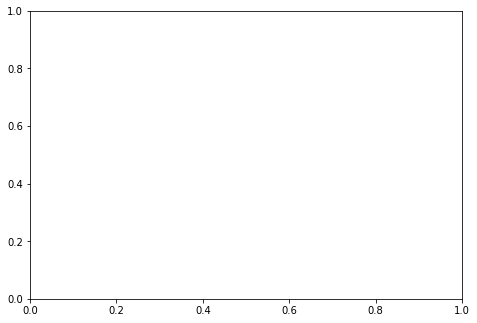

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
#G=nx.Graph()
G#.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  #(5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,'root')    
nx.draw(G, pos=pos, with_labels=False,node_size=1)
plt.savefig('hierarchy.png')